## P1: Test a Perceptual Phenomenon
### Student: Andy Miller
#### October 21st 2015

In [2]:
# Setup and Import Commands
# Render the plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# Import the data from the provided CSV File
df = pd.read_csv('/Users/Miller/GitHub/GhNanoDegree/Projects/P1_Test_a_Perceptual_Phenomenon/Files/P1_stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


#### Question 1. What is our independent variable? What is our dependent variable?

The independent variable is the type of condition being tested (two conditions: 1) congruent words, and 2) incongruent words). 

The dependent variable is the time it takes to name the ink colors (from equally-sized lists).

#### Question 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
The hypotheses for this task would be to determine whether two data sets (one for each condition) are significantly different from each other.  More formally: 
- The Null hypothesis is that the population means are equal between the two conditions (as inferred from the sample data for the two tests);
- The Alternative hypothesis is that the population means are NOT equal between the two conditions (as inferred from the sample data for the two tests).

I expect to utilize a two-tailed dependent samples (paired-samples) t-test to understand whether there are any statistically significant differences between the means of the two conditions.  I choose this test because we have two conditions with values from the same subject.  An advantage of this test is that it controls for individual differences, however it should be noted that a disadvantage is the carry-over effects for the subject, meaning the second measurement can be affected by the first condition (e.g., the user may have gotten better at reading words just because they were more adept at the task after the first condition).  In addition, and as a precursor to the t-test, I plan to perform a variety of centrality and variability measurements to understand the sample data.

#### Question 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Upon reviewing the data (refer to P1_Stroop_Review.PDF), I am reporting the following descriptive statistics regarding this sample data: 
1. The two conditions' means, for congruent and incongruent, have sample means of 14.05 and 22.02, respectively.  That is a difference of -7.96.  On average, the congruent condition has a lower time to name the colors for subjects.  The median values are very close to their mean, meaning there are likely few outliers in the distribution.
2. The two conditions' standard errors (standard deviation of the samples), for congruent and incongruent, have standard errors of 3.56 and 4.8, respectively.  The values for the incongruent condition sample have a greater variability, meaning that the values in the incongruent sample, vary more significantly from the mean, than the congruent sample.

Below I have performed these calculations within the notebook:

In [123]:
print 'Congruent Mean: ', round(df['Congruent'].mean(),2)
print 'Incongruent Mean: ',round(df['Incongruent'].mean(),2) 
print 'Congruent Median: ', round(df['Congruent'].median(),2) 
print 'Incongruent Median: ',round(df['Incongruent'].median(),2) 
print 'Congruent Standard Error: ', round(df['Congruent'].std(),2) 
print 'Incongruent Standard Error: ',round(df['Incongruent'].std(),2)

Congruent Mean:  14.05
Incongruent Mean:  22.02
Congruent Median:  14.36
Incongruent Median:  21.02
Congruent Standard Error:  3.56
Incongruent Standard Error:  4.8


#### Question 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Below I am providing a few different views of the data.  
1. A histogram for each condition (congruent and incongruent) which shows the distribution of the values.
2. A scatter plot of the values, with dots representing the intersection of the subjects congruent and incongruent results.

1 - Histogram (Congruent) - Below
- As you can see, the subjects are completing the test between 10 and 19 seconds, right around the mean of 14 seconds.

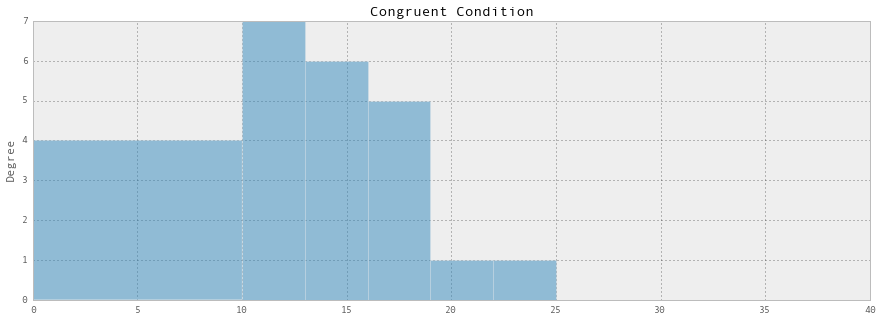

In [121]:
df['Congruent'].plot(kind='hist', alpha = .5, bins = [0,10,13,16,19,22,25,28,31,34,37,40], title ="Congruent Condition");

1 - Histogram (Incongruent) - Below
- As you can see, the subjects are completing the test right around 16 to 25 seconds, right around the mean of 22 seconds, an increase over the congruent data above.

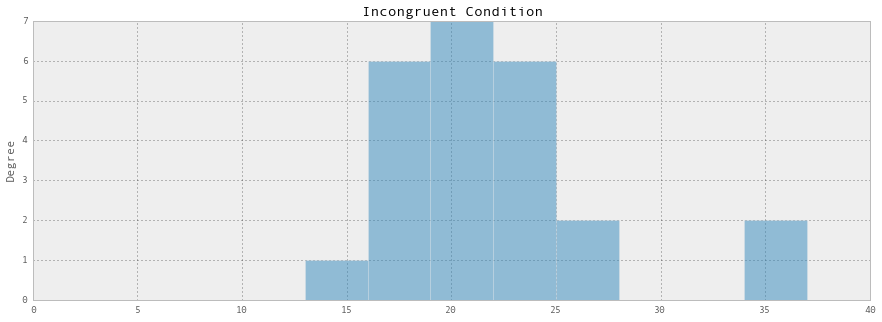

In [122]:
df['Incongruent'].plot(kind='hist', alpha = .5, bins = [0,10,13,16,19,22,25,28,31,34,37,40],title ="Incongruent Condition");

2 - Scatter Plot (Both Conditions) - Below
The dots represent the intersection of the subjects congruent (x-axis) and incongruent (y-axis) samples, with the bubble size gaining size in relation to their incongruent condition result.  

There is a linear relationship, whereby the subjects produce a larger incongruent score as they increase the congruent score increases.  This makes sense, as we believe that incongruent results are typically greater than the congruent results.

(5, 40)

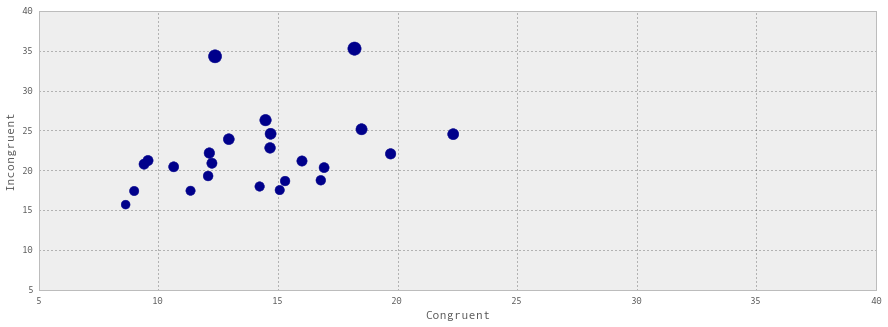

In [125]:
df.plot(kind='scatter', x = 'Congruent', y = 'Incongruent', color = 'DarkBlue', s=df['Incongruent']*5);
plt.xlim(5,40); plt.ylim(5,40)

#### Question 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In addition to the PDF (refer to P1_Stroop_Review.PDF) that I have uploaded, which shows the calculations (which were done in an excel workbook), I have performed the dependent samples t-test below.

In [127]:
# Perform the Depedent Samples t-Test, which returns the t-statistic and the p-value.
ttest_results = stats.ttest_rel(df['Congruent'],df['Incongruent'])
(t_stat,p_value) = (ttest_results)
print "t-Statistic: ",t_stat
print "p-Value: ", p_value

t-Statistic:  -8.02070694411
p-Value:  4.10300058571e-08


My t-critical value is +-2.0687 at an alpha level of .05 (using 23 degrees of freedom).  
My confidence levels are: Upper: -5.9105, Lower: -10.01907 - This allows us to conclude that subjects will perform the congruent condition test between 5.9 and 10 seconds faster than the incongruent condition.

Overall, the results are statistically significant at alpha .05, as the t-statistic value of -8.02 is far less than the t-critical value of -2.0687, out in the critical region.  The p-value suggests the obtaining these observed sample results by chance is extremely unlikely (on the order of a .000004103% chance).  I would reject the null hypothesis.  This means that the values from the congurent test were signficantly less than the incongruent sample. 

#### Question 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think that the brain has a more difficult time processing the incongruent condition.  One reason is simply because the brain has been conditioned to read WORDS, not the color words are printed in.  However, I think that this is something that could improve drastically over time.  If a human were to practice reading the color of the word instead of the word, I believe they would improve in the incongruent condition test over time.  From reading about the Stroop Effect, I understand that these conditions demonstrate the interference in the reaction time of a task, as one of the theories states that "there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors.  This is based on the idea that word processing is significantly faster than color processing." (http://www.wisegeek.org/what-is-the-stroop-effect.htm).

I think there are many tasks that would result in a similar effect, one such example would be to count the number of words in a box, with the first test condition showing common words (e.g., dog, cat, hat) and the second test condition showing words of numbers (e.g., one, two, three).  